In [1]:
from pathlib import Path
import sys

REPO_ROOT = Path.cwd().resolve()
if (REPO_ROOT / "src").exists() is False:
    # If you opened the notebook from inside /notebooks
    REPO_ROOT = REPO_ROOT.parent

if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

In [2]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y-%m-%d_%H%M")
FIG_DIR = REPO_ROOT / "outputs" / "figures"
TAB_DIR = REPO_ROOT / "outputs" / "tables"

FIG_DIR.mkdir(parents=True, exist_ok=True)
TAB_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

REPO_ROOT = Path.cwd().resolve().parents[0]
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

from src.config import base_case
from src.model import run_deterministic_unit_econ, result_to_dict

In [4]:
default_range = np.linspace(0.02, 0.15, 40)

profits = []

base = base_case()  # one base object

for dr in default_range:
    temp = base.model_copy(update={"default_rate": float(dr)})
    result = run_deterministic_unit_econ(temp)
    d = result_to_dict(result)
    profits.append(d["contribution_profit"])

sens_df = pd.DataFrame({
    "default_rate": default_range,
    "contribution_profit": profits
})

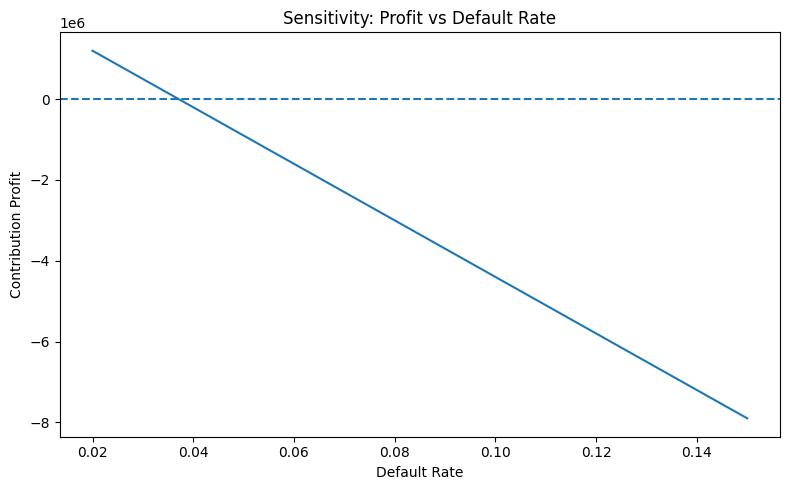

In [5]:
plt.figure(figsize=(8,5))
plt.plot(sens_df["default_rate"], sens_df["contribution_profit"])
plt.axhline(0, linestyle="--")
plt.title("Sensitivity: Profit vs Default Rate")
plt.xlabel("Default Rate")
plt.ylabel("Contribution Profit")
plt.tight_layout()
plt.show()

In [6]:
base = base_case()

for dr in [0.02, 0.08, 0.15]:
    temp = base.model_copy(update={"default_rate": float(dr)})
    d = result_to_dict(run_deterministic_unit_econ(temp))
    print(dr, d["expected_credit_loss"], d["contribution_profit"])

0.02 1400000.0 1200000.0000000019
0.08 5600000.0 -2999999.999999998
0.15 10500000.0 -7899999.999999998


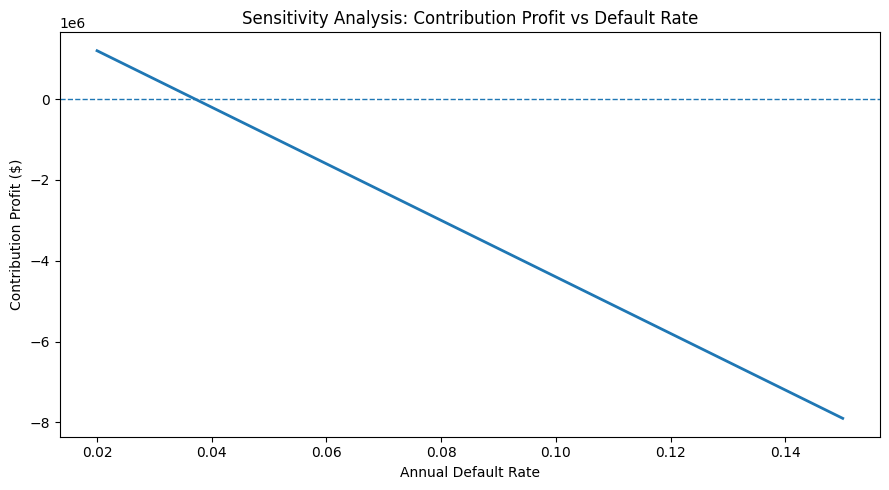

Saved: C:\Users\Finn Case\OneDrive\Desktop\fintech-unit-econ-sim\outputs\figures\default_rate_sensitivity_2026-02-25_2149.png


In [7]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y-%m-%d_%H%M")
figs_dir = REPO_ROOT / "outputs" / "figures"
figs_dir.mkdir(parents=True, exist_ok=True)

plt.figure(figsize=(9,5))
plt.plot(sens_df["default_rate"], sens_df["contribution_profit"], linewidth=2)
plt.axhline(0, linestyle="--", linewidth=1)
plt.title("Sensitivity Analysis: Contribution Profit vs Default Rate")
plt.xlabel("Annual Default Rate")
plt.ylabel("Contribution Profit ($)")
plt.tight_layout()

file_path = figs_dir / f"default_rate_sensitivity_{timestamp}.png"
plt.savefig(file_path, dpi=200)
plt.show()

print("Saved:", file_path)


In [8]:
cac_range = np.linspace(100, 400, 40)

profits_cac = []

base = base_case()

for c in cac_range:
    temp = base.model_copy(update={"cac_per_account": float(c)})
    d = result_to_dict(run_deterministic_unit_econ(temp))
    profits_cac.append(d["contribution_profit"])

sens_cac = pd.DataFrame({
    "cac_per_account": cac_range,
    "contribution_profit": profits_cac
})

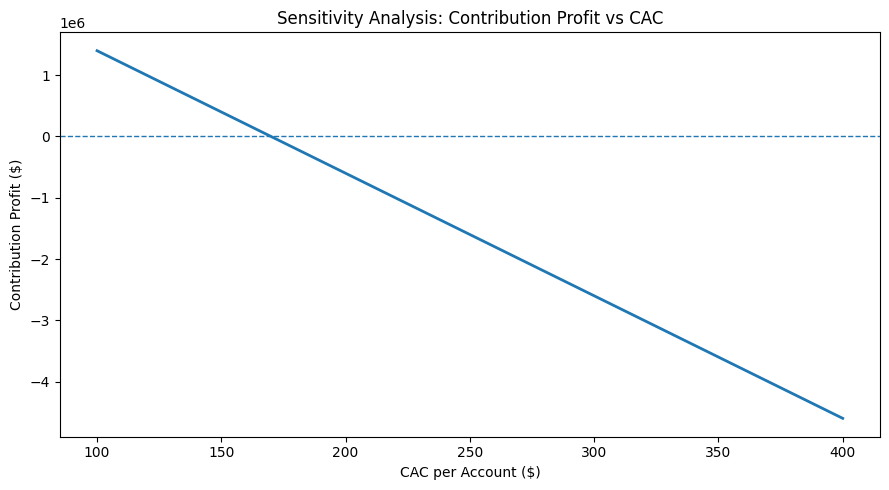

In [9]:
plt.figure(figsize=(9,5))
plt.plot(sens_cac["cac_per_account"], sens_cac["contribution_profit"], linewidth=2)
plt.axhline(0, linestyle="--", linewidth=1)
plt.title("Sensitivity Analysis: Contribution Profit vs CAC")
plt.xlabel("CAC per Account ($)")
plt.ylabel("Contribution Profit ($)")
plt.tight_layout()
plt.show()

In [10]:
# Approximate slope (dProfit / dParameter)

# Default slope (using first and last points)
d_profit_default = sens_df["contribution_profit"].iloc[-1] - sens_df["contribution_profit"].iloc[0]
d_default = sens_df["default_rate"].iloc[-1] - sens_df["default_rate"].iloc[0]
slope_default = d_profit_default / d_default

# CAC slope
d_profit_cac = sens_cac["contribution_profit"].iloc[-1] - sens_cac["contribution_profit"].iloc[0]
d_cac = sens_cac["cac_per_account"].iloc[-1] - sens_cac["cac_per_account"].iloc[0]
slope_cac = d_profit_cac / d_cac

print("Approx slope (profit per 1.0 default rate change):", slope_default)
print("Approx slope (profit per $1 CAC change):", slope_cac)

Approx slope (profit per 1.0 default rate change): -70000000.0
Approx slope (profit per $1 CAC change): -20000.0
